In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/My Drive"/

'2019-04-14 194053.gdoc'
'2019-04-14 194053.pdf'
 8085.InstructionSet.full-alphabetical.doc
 aakash
 Abstract___Copy_docx.pdf
 Analog.docx
'Analog ic video '
 BT17ECE041.docx
'BT17ECE041_VIVEK SHARMA.html'
' BT17ECE041_VIVEK SHARMA_LAB5.gdoc'
'BT17ECE055_BHARATH CH_LAB4.docx'
'BT17ECE055_BHARATH CH_LAB4.gdoc'
'BT17ECE074_SUMANTWANKAR_LAB3 (1).gdoc'
 BT17ECE074_SUMANTWANKAR_LAB3.docx
 BT17ECE074_SUMANTWANKAR_LAB3.gdoc
 build_covid_dataset.py
 certificate.jpg
 Check_Box.html
 Classroom
'CMOS ASSIGNMENT_BT17ECE041.gdoc'
 cmos_assignment_bt17ece062.docx
 cmos_assignment_bt17ece062.gdoc
 CMOS.docx
 CMOS.gdoc
'cmos_LAB_bt17ece072 (1).docx'
'cmos_LAB_bt17ece072 (1).gdoc'
'CMOS LAB REPORT.gdoc'
 CMOS_LAB_REPORTS
'Colab Notebooks'
'Copy of disgust_0.jpg'
'Copy of disgust_10.jpg'
'Copy of disgust_11.jpg'
'Copy of disgust_12.jpg'
'Copy of disgust_13.jpg'
'Copy of disgust_14.jpg'
'Copy of disgust_15.jpg'
'Copy of disgust_16.jpg'
'Copy of disgust_17.jpg'
'Copy of disgust_18.jpg'
'Copy of disgust_19

In [ ]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras

from keras.utils import np_utils

from keras import backend as K

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
#Define Datapath
data_path = '/content/gdrive/My Drive/data1'
data_dir_list = os.listdir(data_path)

img_rows=256
img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(28,28))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape
        
        


Loaded the images of dataset-disgust

Loaded the images of dataset-fear

Loaded the images of dataset-happiness

Loaded the images of dataset-others

Loaded the images of dataset-repression

Loaded the images of dataset-sadness

Loaded the images of dataset-surprise



(16427, 128, 128, 3)

In [ ]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:4203]=0 #30
labels[4204:4330]=1 #29
labels[4331:6690]=2 #32
labels[6691:12713]=3 #31
labels[12714:14890]=4 #30
labels[14891:15040]=5 #31
labels[15041:]=6 #30

names = ['DISGUST','FEAR','HAPPY','OTHER','REPRESSION','SAD','SURPRISE']

def getLabel(id):
    return ['DISGUST','FEAR','HAPPY','OTHER','REPRESSION','SAD','SURPRISE'][id]

In [ ]:
# convert class labels to on-hot encoding# conve 
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

In [ ]:


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model

nb_classes=7

input_shape=img_data[0].shape
    # define model
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


In [ ]:
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 63, 64)       

In [ ]:
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

In [ ]:
from keras import callbacks
filename='model_train_new.csv'
filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

In [ ]:
# Training
hist = model.fit(X_train, y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 13962 samples, validate on 2465 samples
Epoch 1/10
13962/13962 [==============================] - 1220s 87ms/step - loss: 0.6626 - accuracy: 0.7606 - val_loss: 0.0886 - val_accuracy: 0.9736
Epoch 2/10
13962/13962 [==============================] - 1224s 88ms/step - loss: 0.1083 - accuracy: 0.9636 - val_loss: 0.0431 - val_accuracy: 0.9769
Epoch 3/10
13962/13962 [==============================] - 1229s 88ms/step - loss: 0.0623 - accuracy: 0.9794 - val_loss: 0.0382 - val_accuracy: 0.9834
Epoch 4/10
13962/13962 [==============================] - 1219s 87ms/step - loss: 0.0503 - accuracy: 0.9830 - val_loss: 0.0345 - val_accuracy: 0.9842
Epoch 5/10
13962/13962 [==============================] - 1223s 88ms/step - loss: 0.0436 - accuracy: 0.9858 - val_loss: 0.0273 - val_accuracy: 0.9886
Epoch 6/10
13962/13962 [==============================] - 1222s 88ms/step - loss: 0.0391 - accuracy: 0.9862 - val_loss: 0.0269 - val_accuracy: 0.9915
Epoch 7/10
13962/13962 [===========================

In [ ]:
#Model Save
model.save_weights('model_weights_data1.h5')
model.save('model_keras_data1.h5')

<Figure size 432x288 with 0 Axes>

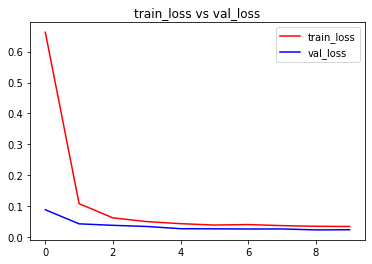

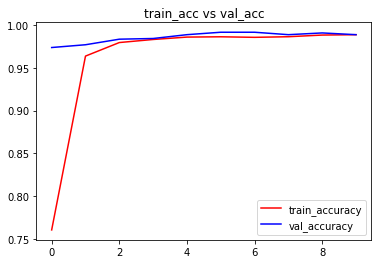

<Figure size 432x288 with 0 Axes>

In [ ]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_accuracy')
plt.plot(epochs,val_acc,'b', label='val_accuracy')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

Test Loss: 0.02397887331886268
Test accuracy: 0.9886409640312195
(1, 128, 128, 3)
[[5.0432408e-01 4.8870978e-01 4.8199962e-03 5.4155395e-04 1.1735059e-03
  2.1679694e-04 2.1432656e-04]]
[0]
[[0. 1. 0. 0. 0. 0. 0.]]


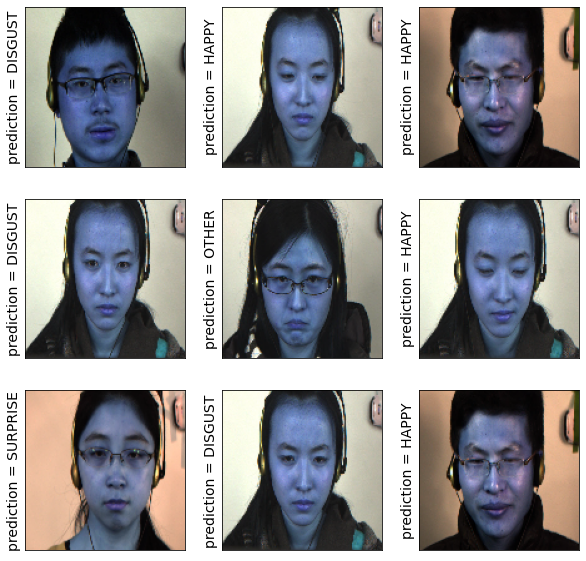

In [ ]:


# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

res = model.predict_classes(X_test[:9])
plt.figure(figsize=(10, 10))

for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_test[i],cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)
# show the plot
plt.show()

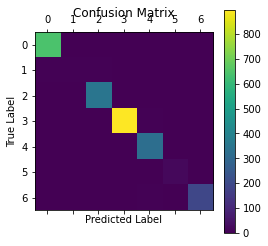

In [ ]:
from sklearn.metrics import confusion_matrix
results = model.predict_classes(X_test)
cm = confusion_matrix(np.where(y_test == 1)[1], results)
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

test image original shape (128, 128, 3)
image original shape (128, 128, 3)


Text(0.5, 0, 'prediction = SURPRISE')

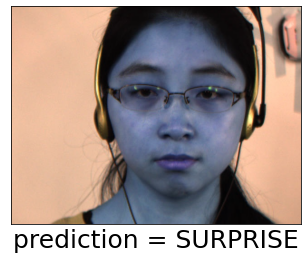

In [ ]:
testimg_data_list=[]
test_img=cv2.imread('/content/surprise_904.jpg', True)
    
test_img_resize=cv2.resize(test_img,(128,128))
testimg_data_list.append(test_img_resize)
testimg_data = np.array(testimg_data_list)
testimg_data = testimg_data.astype('float32')
testimg_data = testimg_data/255
testimg_data.shape

print("test image original shape",testimg_data[0].shape)
print("image original shape",img_data[0].shape)

results = model.predict_classes(testimg_data)
plt.imshow(test_img,cmap=plt.get_cmap('Set2'))
plt.gca().get_xaxis().set_ticks([])
plt.gca().get_yaxis().set_ticks([])
plt.xlabel('prediction = %s' % getLabel(results[0]), fontsize=25)